<a href="https://colab.research.google.com/github/Pritam-Mondal18/task-3/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement and understand simple & multiple linear regression.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [53]:
df = pd.read_csv('Housing.csv')

In [54]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [55]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [56]:
df = pd.get_dummies(df, drop_first=True)

In [57]:
X = df.drop('price', axis=1)
y = df['price']

# Split data into train-test sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [59]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (436, 13)
Testing data shape: (109, 13)


# Fit a Linear Regression model using sklearn.linear_model

In [60]:
model = LinearRegression()

In [61]:
model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)

# Evaluate model using MAE, MSE, R²

In [63]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [64]:
print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)

MAE: 970043.4039201636
MSE: 1754318687330.6638
R² Score: 0.6529242642153184


# Plot regression line and interpret coefficients

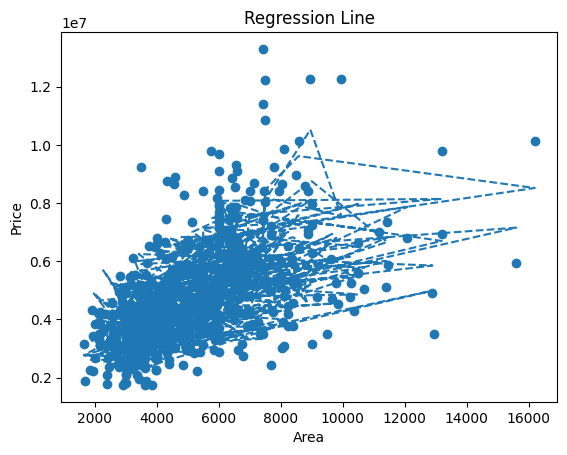

In [65]:

if 'area' in df.columns:
    plt.scatter(df['area'], df['price'])
    plt.xlabel("Area")
    plt.ylabel("Price")

    area_values = df[['area']]
    price_pred = model.predict(X)

    plt.plot(df['area'], price_pred, linestyle='dashed')
    plt.title("Regression Line")
    plt.show()


# Coefficients interpretation

In [66]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)
print("Intercept:", model.intercept_)


                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
Intercept: 260032.35760741215
